# 04. Функции высших порядков

<div style="text-align: right"> 
    
    Лекция 3 19/02/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## 4.1 Разбор HT1

### 4.1.1. Task 1

```haskell
bitOnes :: Integer -> Int
bitOnes: 0 = 0
bitOnes n = fromIntegral (n `mod` 2) + bitOnes (n `div` 2)

main = do
    print $ map bitOnes [1..50]
```

In [8]:
bitOnes :: Integer -> Int
bitOnes 0 = 0
bitOnes n = fromIntegral (n `mod` 2) + bitOnes (n `div` 2)

map bitOnes [1..50]

[1,1,2,1,2,2,3,1,2,2,3,2,3,3,4,1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5,1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5,2,3,3]

### 4.1.2 Task 2

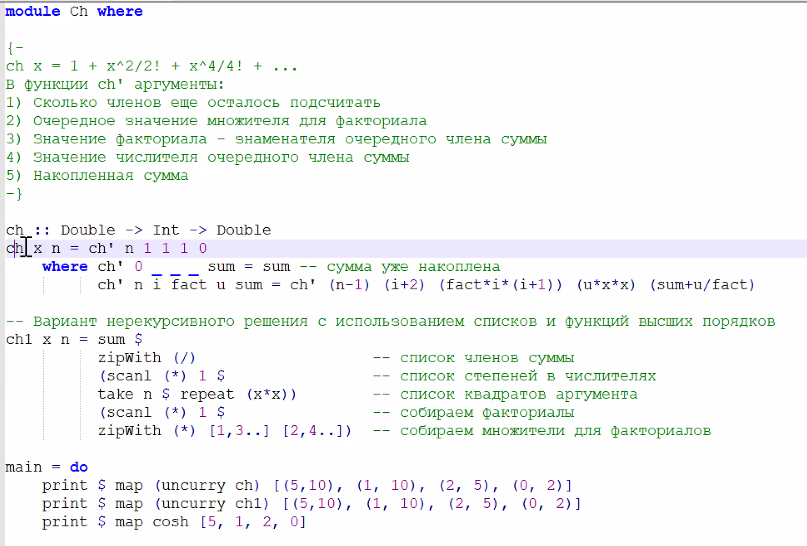

`:set +s` - время выполнения программы

### 4.1.3. Task 3

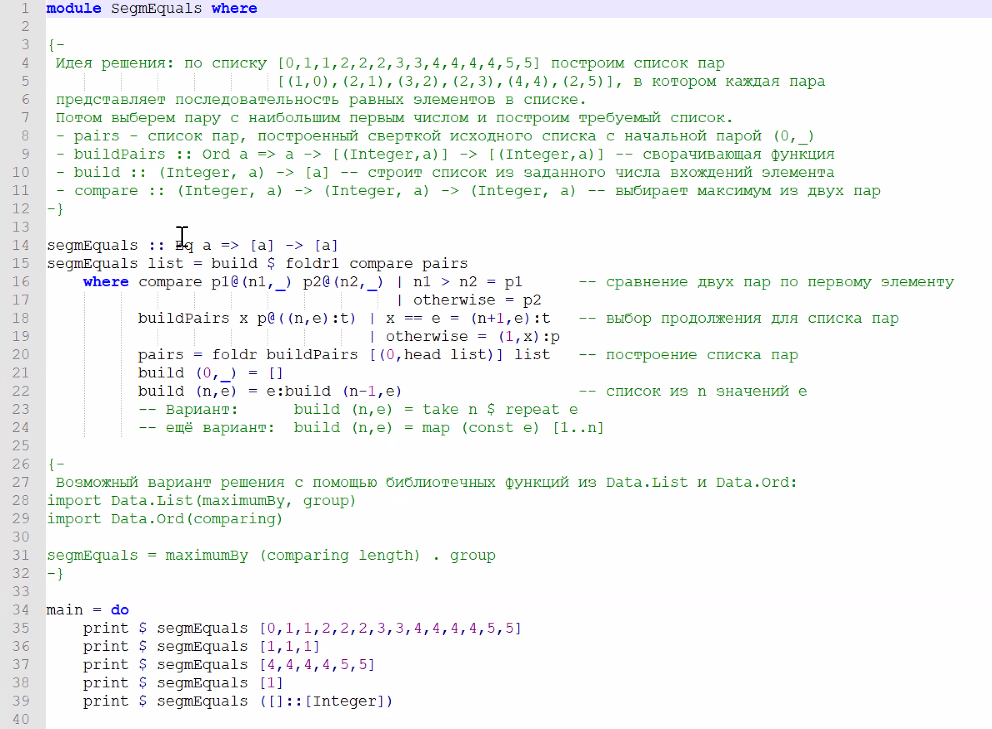

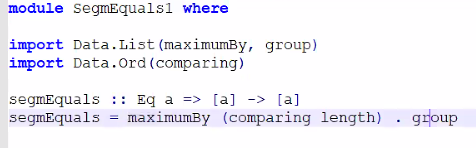

## 4.2 Функции высших порядков

### 4.2.1. Варианты  функций  `take`, `drop`, `splitAt`

- `takeWhile` - первые $n$ элементы, удовлетворяющие условию

In [10]:
takeWhile :: (a -> Bool) -> [a] -> [a]
takeWhile _ [] = []
takeWhile f (x:lst) | f x       = x : takeWhile f lst
                    | otherwise = []

In [12]:
take 5 [3,2,4,5,7,3,8,1,9] 

[3,2,4,5,7]

In [15]:
takeWhile (\x -> x <= 5) [3,2,4,5,7,3,8,1,9]

Line 1: Avoid lambda using `infix`
Found:
(\ x -> x <= 5)
Why not:
(<= 5)

[3,2,4,5]

- `dropWhile`

In [16]:
dropWhile :: (a -> Bool) -> [a] -> [a]
dropWhile _ [] = []
dropWhile f list@(x:lst) | f x       = dropWhile f lst
                         | otherwise = list


In [17]:
drop 5 [3,2,4,5,7,3,8,1,9]

[3,8,1,9]

In [18]:
dropWhile (\x -> x <= 5) [3,2,4,5,7,3,8,1,9]

Line 1: Avoid lambda using `infix`
Found:
(\ x -> x <= 5)
Why not:
(<= 5)

[7,3,8,1,9]

- `span` - разибение по функции - доходим до первого элемента, который не удовлетворяет функции и присоединяет вторым хвост

In [19]:
span :: (a -> Bool) -> [a] -> ([a],[a])
span _ [] = ([],[])
span f list@(x:lst) | f x = let (fst, snd) = span f lst in (x:fst, snd)
                    | otherwise = ([], list)

In [20]:
splitAt 5 [3,2,4,5,7,3,8,1,9]

([3,2,4,5,7],[3,8,1,9])

In [21]:
span (\x -> x <= 5) [3,2,4,5,7,3,8,1,9]

Line 1: Avoid lambda using `infix`
Found:
(\ x -> x <= 5)
Why not:
(<= 5)

([3,2,4,5],[7,3,8,1,9])

### 4.2.2. Свёртки сложных структур данных

Хочу сделать обход дерева

In [22]:
data Tree a = Empty |
              Node (Tree a) a (Tree a)


Используется правосторонний обход дерева:

Правосторонний обход этого дерева: F, C, E, A, B, D

Функция, осуществляющая свертку в порядке правостороннего обхода:

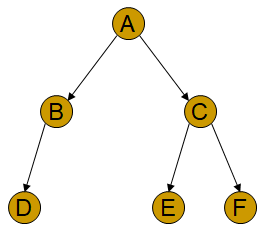

In [ ]:
foldTree (++) seed t1  =>
         D ++ (B ++ (A ++ (E ++ (C ++ (F ++ seed)))))

In [26]:
foldTree  ::  (a -> b -> b) -> b -> Tree a -> b
foldTree _ seed Empty           =  seed
foldTree f seed (Node t1 n t2)  =  foldTree f (f n (foldTree f seed t2)) t1

In [30]:
-- «Разглаживание» дерева с помощью foldTree:
flatten    ::  Tree a -> [a]
flatten t  =   foldTree (:) [] t

Line 3: Eta reduce
Found:
flatten t = foldTree (:) [] t
Why not:
flatten = foldTree (:) []

### 4.2.3. Сортировка дерева

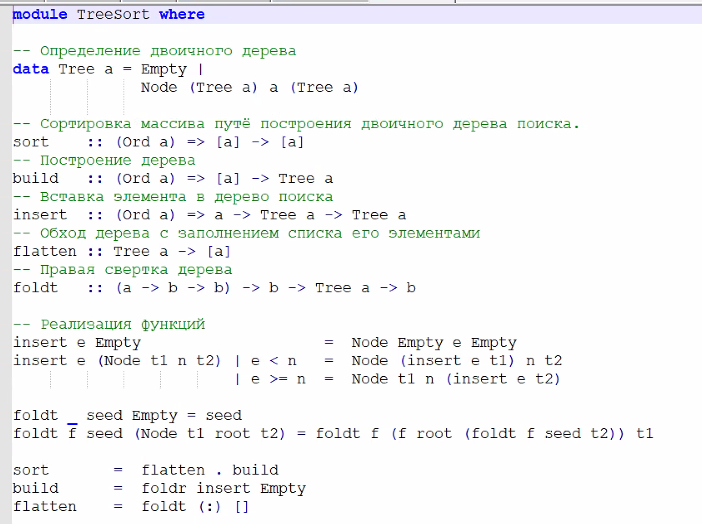

## 4.3 Карринг

Есть довольно общее понятие - *частичная параметризация функци* - если есть несколько аргументов, то можно задать лишь некоторые из них, чтобы получить новую функцию, чтобы передать ей уже остальные аргументы.

In [31]:
plus :: Integer -> Integer -> Integer
plus x y = x + y -- функция двух аргументов

In [32]:
plus2 :: Integer -> Integer
plus2 y = 2 + y

Данная функция может быть результатом частичной параметризации - определим через функцию `plus

In [36]:
plus2 :: Integer -> Integer
plus2 y = plus 2 y

Line 2: Eta reduce
Found:
plus2 y = plus 2 y
Why not:
plus2 = plus 2

In [37]:
map plus2 [5, 3, 8, 10]

[7,5,10,12]

- `plus2` - если + применить к двойке - частичная параметризация - функцию двойки можно применить лишь к первому аргументу

In [38]:
plus2 :: Integer -> Integer
plus2 = plus 2

In [39]:
map (plus 2) [5, 3, 8, 10]

[7,5,10,12]

Если функция, параметризованная первым элементом, то она называется **карринговой**. В `Haskell` все функции - функции одного аргумента - и все карринговые.

Функция на вход подаёт Integer, а в результате получается функция (Integer -> Integer). Можно сказать, что `->` - операция над типами - она правоассоциативная: `Integer -> (Integer -> Integer)`. Любая функция - функция одного аргумента.

In [40]:
plus :: Integer -> (Integer -> Integer)
plus x = \y -> x + y

Line 2: Redundant lambda
Found:
plus x = \ y -> x + y
Why not:
plus x y = x + yLine 2: Avoid lambda
Found:
\ y -> x + y
Why not:
(x +)

In [42]:
plus :: Integer -> (Integer -> Integer)
plus = \x y -> x + y

Line 2: Redundant lambda
Found:
plus = \ x y -> x + y
Why not:
plus x y = x + yLine 2: Avoid lambda
Found:
\ x y -> x + y
Why not:
(+)

### 4.3.1 Различные формы записи уравнений

In [43]:
comp :: (b->c) -> (a->b) -> (a->c)
comp f g = \x -> f (g x)

Line 2: Redundant lambda
Found:
comp f g = \ x -> f (g x)
Why not:
comp f g x = f (g x)Line 2: Avoid lambda
Found:
\ x -> f (g x)
Why not:
f . g

In [45]:
-- новая запись
comp :: (b->c) -> (a->b) -> (a->c)
comp f g x = f (g x)

In [48]:
comp :: (b->c) -> (a->b) -> (a->c)
comp = \f -> \g -> \x -> f (g x)

Line 2: Redundant lambda
Found:
comp = \ f -> \ g -> \ x -> f (g x)
Why not:
comp f g x = f (g x)Line 2: Collapse lambdas
Found:
\ f -> \ g -> \ x -> f (g x)
Why not:
\ f g x -> f (g x)Line 2: Avoid lambda
Found:
\ x -> f (g x)
Why not:
f . g

Все функции в Haskell - это функции с одним аргументом и одним результатом!
Haskell B.Curry - карринг - карринговые функции - частично параметризуемые функции.

In [51]:
-- в карринговй форме
plus1 :: Integer -> Integer -> Integer
plus1 x y = x + y

In [52]:
-- работает с кортежем, не в карринговой форме
plus2 :: (Integer, Integer) -> Integer
plus2 (x,y) = x + y

Можно преобразовывать карринговые фукции не в карринговые:

- `curry plus2 => plus1` - берёт кортеж, превращает в карринговую форму
- `uncurry plus1 -> plus` - становится функцией от пары (кортежа)

In [55]:
curry :: ((a, b)->c) -> (a -> b -> c)
uncurry :: (a -> b -> c) -> ((a, b) -> c)
curry f x y = f (x, y) -- есть новая функция, с телом f (x, y)
uncurry f (x, y) = f x y

### 4.3.2. Сечения

In [ ]:
(+) :: (Num a) => a -> a -> a
(+) x y = x + y
(+) 5 8

Press Ctrl-C again to quit kernel.

In [ ]:
(+) 5 -> \n -> 5 + n
(5 +)

In [3]:
raiseList :: (Num a) => [a] -> [a]
raiseList lst = map (1+) lst

Line 2: Eta reduce
Found:
raiseList lst = map (1 +) lst
Why not:
raiseList = map (1 +)

In [6]:
(+) ? 8 -> \n -> n + 8
(+ 8)

: 

In [8]:
searchList :: (Eq a) => a -> [a] -> Bool
searchList  e = (foldr (||) False) . (map (==e))

Line 2: Redundant bracket
Found:
(foldr (||) False) . (map (== e))
Why not:
foldr (||) False . (map (== e))Line 2: Use or
Found:
foldr (||) False
Why not:
orLine 2: Redundant bracket
Found:
(foldr (||) False) . (map (== e))
Why not:
(foldr (||) False) . map (== e)

In [9]:
searchList 5 [1, 3, 7, 5, 2]

True

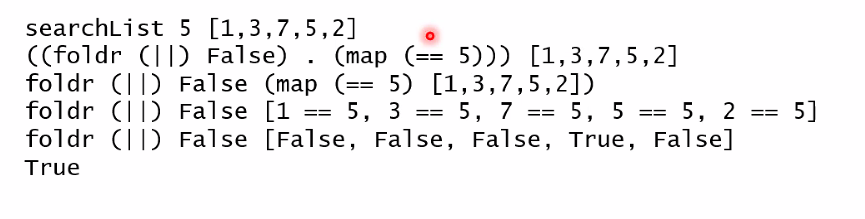

### 4.3.3. Еще раз о сортировке списка с помощью дерева

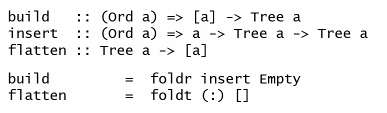

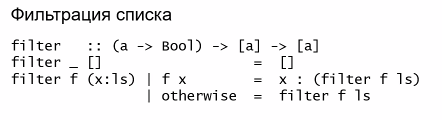

In [11]:
filter :: (a -> Bool) -> [a] -> [a]
filter _ [] = []
filter f (x:ls) | f x = x : (filter f ls)
                | otherwise = filter f ls

Line 3: Redundant bracket
Found:
x : (filter f ls)
Why not:
x : filter f ls

In [14]:
filter :: (a -> Bool) -> [a] -> [a]
filter f = foldr condCons []
           where condCons x l = if f x then x:l else l

In [15]:
quicksort :: (Ord a) => [a] -> [a]
quicksort [] = []
quicksort (x:ls) = (quicksort (filter (<x) ls)) ++ [x] ++ (quicksort (filter (>=x) ls))

Line 3: Redundant bracket
Found:
(quicksort (filter (< x) ls))
  ++ [x] ++ (quicksort (filter (>= x) ls))
Why not:
quicksort (filter (< x) ls)
  ++ [x] ++ (quicksort (filter (>= x) ls))Line 3: Redundant bracket
Found:
[x] ++ (quicksort (filter (>= x) ls))
Why not:
[x] ++ quicksort (filter (>= x) ls)

In [17]:
quicksort :: (Ord a) => [a] -> [a]
quicksort [] = []
quicksort (x:ls) = (quicksort [y | y <- ls, y < x]) ++ [x] ++ (quicksort [y | y<-ls, y >= x])

Line 3: Redundant bracket
Found:
[x] ++ (quicksort [y | y <- ls, y >= x])
Why not:
[x] ++ quicksort [y | y <- ls, y >= x]

Эффективный вариант:

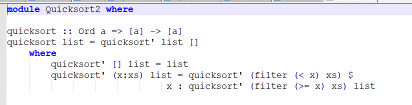

`filter` - формируется новый список:
- `<-` - указываем источники - хвост списка `ls`, берём элементы y
- `,` - описываем условиея
- `|` - результаты, которые описываются

In [25]:
descartes ls1 ls2 = [(x, y) | x <- ls1, y <- ls2]

In [26]:
oddSqrs ls = [x*x | x <- ls, x `mod` 2 == 1]

In [27]:
descartes [1, 2] [1, 2, 3]

[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3)]

### 4.3.4. Комбинирование списков

- `zipWith` - получает более короткий

In [28]:
zipWith :: (a->b->c) -> [a] -> [b] -> [c]
zipWith f (x1:lst1) (x2:lst2) = (f x1 x2) : zipWith f lst1 lst2
zipWith _ _ _ = []

Line 2: Redundant bracket
Found:
(f x1 x2) : zipWith f lst1 lst2
Why not:
f x1 x2 : zipWith f lst1 lst2

In [29]:
zipWith (+) [1..5] [8,7..1]

[9,9,9,9,9]

In [39]:
zipWith (<) [1, 3, 2, 5, 6] (tail [1, 3, 2, 5, 6]) 

[True,False,True,True]

In [40]:
zip = zipWith (,)

- `zipWith3`

In [42]:
zipWith3 (\x y z -> max x (max y z)) [2, 5, 4, 1] [2, 1, 5, 3] [9, 1, 2, 4] -> [9, 5, 5, 4] -- поэлементные максимумы

: 

In [43]:
zipWith3 [2, 5, 4, 1] [2, 1, 5, 3] [9, 1, 2, 4] 

: 

### 4.3.5. Характеристическая функция множества

`type InstSet = (Integer -> Bool)`

In [46]:
-- пустое множество
type IntSet = (Integer -> Bool)
empty :: IntSet
empty e = False

- от 2 до 100
    - можно определять функции, на самом деле являются множествами

In [48]:
from2to100 :: IntSet
from2to100 e  = (e >=2) && (e <=100)

In [49]:
odds :: IntSet
odds e = (e `mod` 2 == 1)

Line 2: Redundant bracket
Found:
(e `mod` 2 == 1)
Why not:
e `mod` 2 == 1

In [50]:
conj :: IntSet -> IntSet -> IntSet
(s1 `conj` s2) e = (s1 e) && (s2 e)

Line 2: Redundant bracket
Found:
(s1 e) && (s2 e)
Why not:
s1 e && (s2 e)Line 2: Redundant bracket
Found:
(s1 e) && (s2 e)
Why not:
(s1 e) && s2 e

In [51]:
disj :: IntSet -> IntSet -> IntSet
(s1 `disj` s2) e = (s1 e) || (s2 e)

Line 2: Redundant bracket
Found:
(s1 e) || (s2 e)
Why not:
s1 e || (s2 e)Line 2: Redundant bracket
Found:
(s1 e) || (s2 e)
Why not:
(s1 e) || s2 e

In [52]:
diff :: IntSet -> IntSet -> IntSet
(s1 `diff` s2) e = (s1 e) && not (s2 e)

Line 2: Redundant bracket
Found:
(s1 e) && not (s2 e)
Why not:
s1 e && not (s2 e)

In [53]:
addElem :: Integer -> IntSet -> IntSet
addElem a s e = (e == a) || (s e)

Line 2: Redundant bracket
Found:
(e == a) || (s e)
Why not:
(e == a) || s e

In [54]:
remElem :: Integer -> IntSet -> IntSet
remElem a s e = (e /= a) && (s e)

Line 2: Redundant bracket
Found:
(e /= a) && (s e)
Why not:
(e /= a) && s e

- выбираются из множества

In [55]:
fromSet :: IntSet -> [Integer] -> [Integer]
fromSet set ls = [x | x <- ls, set x]

### 4.3.6 Программа с исползованием множества целых

- remMulties - из заданного множества S убирает элементы, делящиеся на a

In [56]:
remMulties :: Integer -> IntSet -> IntSet
remMulties a s e = (s e) && ((e == a) || (e `mod` a /= 0))

Line 2: Redundant bracket
Found:
(s e) && ((e == a) || (e `mod` a /= 0))
Why not:
s e && ((e == a) || (e `mod` a /= 0))

In [57]:
remMultList :: [Integer] -> IntSet -> IntSet
remMultList ls s = foldr remMulties s ls

In [58]:
first1000 :: IntSet
first1000 e = (e >=2) && (e<=1000)

In [63]:
filter (remMultList [3, 5..31] (remMulties 2 first1000)) [1..1000]

[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,503,509,521,523,541,547,557,563,569,571,577,587,593,599,601,607,613,617,619,631,641,643,647,653,659,661,673,677,683,691,701,709,719,727,733,739,743,751,757,761,769,773,787,797,809,811,821,823,827,829,839,853,857,859,863,877,881,883,887,907,911,919,929,937,941,947,953,967,971,977,983,991,997]

*Вычисления с неопределённым результатом*

In [64]:
data Maybe a = Nothing | Just a

само значение Null может быть значением списка - это может означать, что значение по ключу равно `Null`

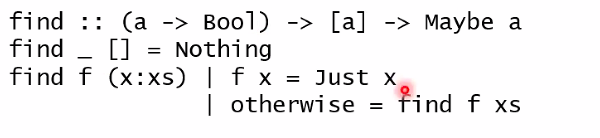

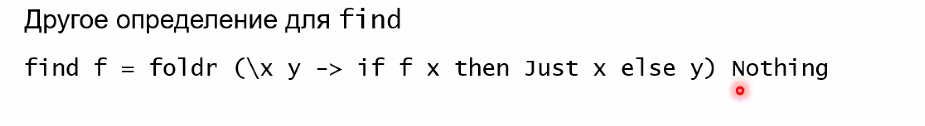

### 4.3.7. Функции, использующие тип `Maybe`

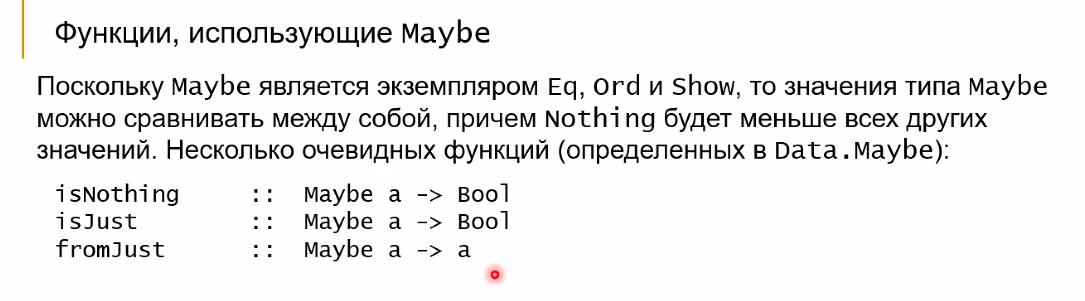

`fromMaybe` - значение по умолчанию - Maybe - в обычное значение - в значение по умолчанию.

In [74]:
data Maybe a = Nothing | Just a

isNothing :: Maybe a -> Bool
isJust :: Maybe a -> Bool
fromJust :: Maybe a -> a

: 

In [66]:
data Maybe a = Nothing | Just a
fromMaybe :: a -> Maybe a -> a
fromMaybe x Nothing = x
fromMaybe _ (Just y) = y

In [68]:
maybe :: b -> (a-> b) -> Maybe a -> b
maybe x _ Nothing = x
maybe _ f (Just y) = f y

- функция, удовлетворяющая некоторому условию

In [70]:
isNothing :: Maybe a -> Bool
isJust :: Maybe a -> Bool
fromJust :: Maybe a -> a

: 

In [69]:
mapMaybe :: (a -> Maybe b) -> [a] -> [b]
mapMaybe f = (map fromJust) . (filter isJust) . (map f)

Line 2: Redundant bracket
Found:
(map fromJust) . (filter isJust) . (map f)
Why not:
map fromJust . (filter isJust) . (map f)Line 2: Redundant bracket
Found:
(filter isJust) . (map f)
Why not:
filter isJust . (map f)Line 2: Redundant bracket
Found:
(filter isJust) . (map f)
Why not:
(filter isJust) . map f

: 

In [71]:
catMaybes :: [Maybe a] -> [a]
catMaybes = (map fromJust) . (filter isJust)

Line 2: Redundant bracket
Found:
(map fromJust) . (filter isJust)
Why not:
map fromJust . (filter isJust)Line 2: Redundant bracket
Found:
(map fromJust) . (filter isJust)
Why not:
(map fromJust) . filter isJust

: 

### 4.3.8 Тип `Either`

Вместо Nothing содержит тег `Left a`

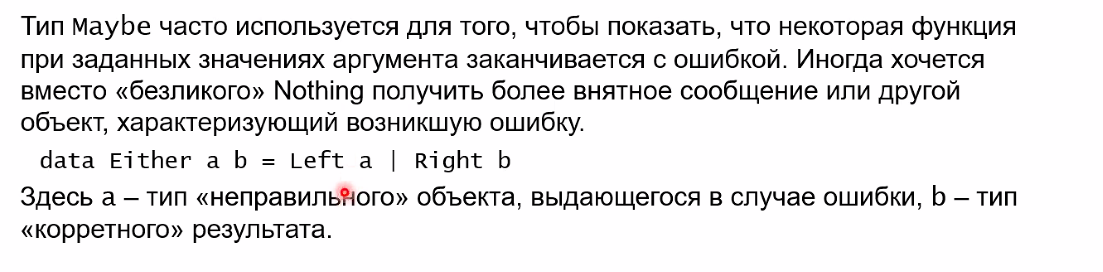

параметризован двумя результами:
- правильный результат
- неправильный результат

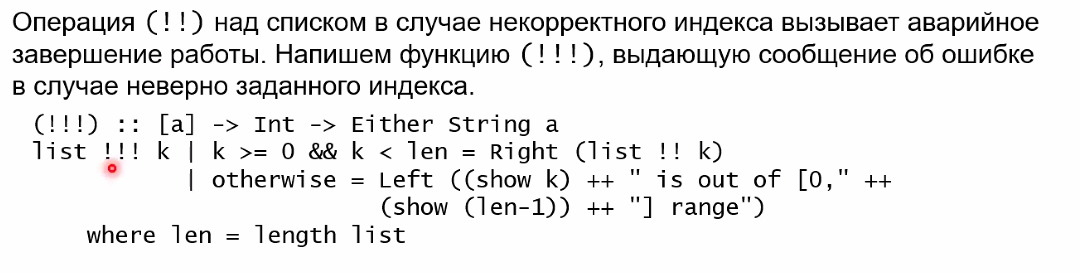

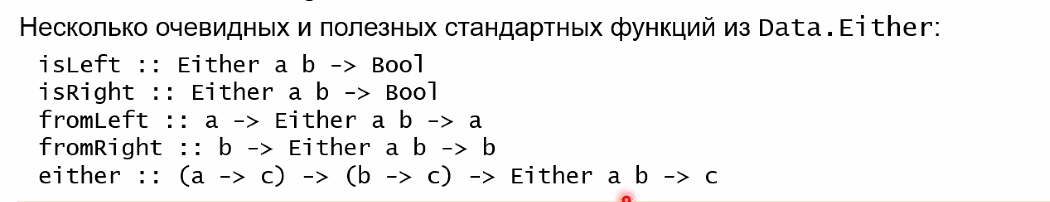

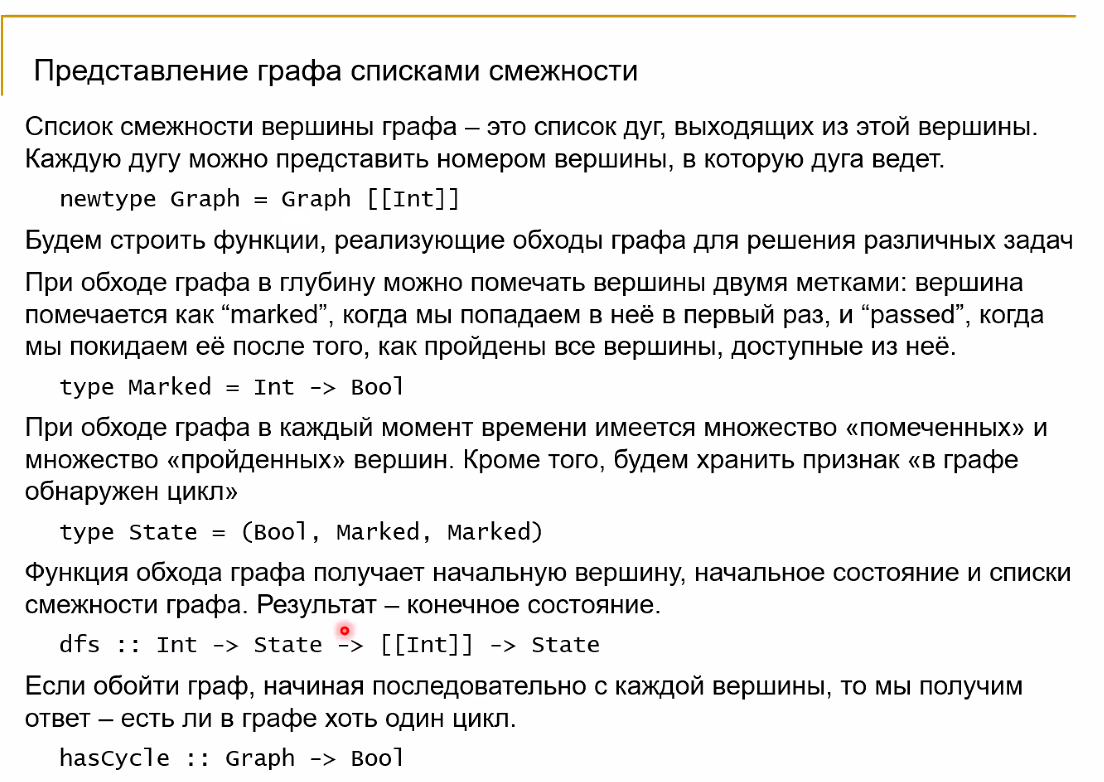